# Constant Gaussian Error Model of Lung Cancer Tumour Growth in Absence of Treatment

The tumour growth inhibitory effects of Erlotinib and Gefitinib were modelled with a population PKPD model in [1]. A population PKPD model is a hierarchical model which consists of a structural model, a population model, and an error model. Each sub-model captures a different aspect of the tumour growth inhibition biology, and is parametrised by a set of parameters.

We introduced the structural model for the untreated tumour growth in [[n1](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/structural_model.ipynb)] and guaranteed its identifiability in [[n2](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/identifiability_structural_model.ipynb)] with transformations of the search space.

In this notebook we model the error of the structural model in absence of treatment. In particular we will choose a Gaussian error of the model output that does not depend on the tumour volume.

## Recap: Observed tumour growth in absence of treatment

In [1] patient-derived tumour explants LXF A677 (adenocarcinoma of the lung) were implanted in mice. The tumour growth was monitored over a period of 30 days. For more information on the dataset please refer to [[n3](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/data_preparation.ipynb)].

In [1]:
import os

import pandas as pd

import pkpd.plots


# Import data
# Get path of current working directory
path = os.getcwd()

# Import LXF A677 control growth data
data = pd.read_csv(path + '/data/lxf_control_growth.csv')

# Create scatter plot
fig = pkpd.plots.plot_measurements(data)

# Show figure
fig.show()

**Figure 1 - Untreated tumour growth:** Untreated tumour growth of patient-derived tumour explants LXF A677 (adenocarcinoma of the lung) implanted in mice. The colouring of the data points indicates the identity of the mice. The evolution of the body weight can be explored by using the buttons in the top right.

## Recap: Structural tumour growth model in absence of treatment

The structural model proposed in [1] is of the form

\begin{equation*}
    \frac{\text{d}V^s_T}{\text{d}t} = \frac{\lambda V^s_T}{V^s_T / V_{\text{crit}} + 1},
\end{equation*}

where $V^s_T$ is the tumour volume predicted by the structural model, $\lambda $ is the exponential growth rate, and $V_{\text{crit}}$ is the critical tumour volume at which the growth dynamics transitions from an exponential growth to a linear growth. For more information on the structural model please refer to [[n1](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/structural_model.ipynb)].

## Error model

The error model in a population PKPD model captures the random deviations of the observations $V^\text{obs}_T$ from the structural model predictions $V^s_T$. Such deviations can be expected to occur due to measurement errors, even if the structural model captured the true underlying dynamics of the tumour growth perfectly. However, in practice both, measurement error and oversimplification of the structural model, may lead to deviations of the observations from the model predictions. As a result, the error model may be interpreted as not just capturing the somewhat meaningless errors introduced by the measurement process, but also as describing important biological processes that the structural model fails to capture.

In this notebook we explore the modelling results for an error $\varepsilon := V^\text{obs}_T - V^s_T$ that is normally distributed with variance $\sigma ^2 _V$. This defines a distribution of measureable tumour volumes 

\begin{equation*}
    V_T \sim \mathcal{N}\left( V^s_T(\psi), \sigma ^2 _V\right) ,
\end{equation*}

which is centered at the structural model predictions $V^s_T$, and has a Gaussian shape with variance $\sigma ^2 _V$. Let us denote the probability density of $V_T$ by $p(V_T | \psi , \sigma ^2 _V)$.

## Inferring the model parameters

In contrast to [[n2](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/identifiability_structural_model.ipynb)], where we inferred the structural model parameters by minimising a somewhat arbitrarily chosen objective function, we are now in a position to construct a statistically much better justified inference scheme. This is because the definition of a distribution of measureable tumour volumes $p(V_T | \psi , \sigma ^2 _V)$ allows us to construct a likelihood with which $p(V_T | \psi , \sigma ^2 _V)$ may have generated the observed time series for a set of model parameters $(\psi, \sigma ^2_V)$. To be more precise, the error model allows us to construct a likelihood with which a set of parameters $(\psi, \sigma ^2_V)$ would have generated the observations $V^\text{obs}_T$, assuming that the observations were generated by the distribution $p(V_T | \psi , \sigma ^2 _V)$ for some set of parameters $(\psi, \sigma ^2_V)$. 

It is worth to note that the latter assumption is almost surely *never* satisfied when modelling biological processes. Especially a complex process such as tumour growth is unlikely to be captured in detail by a parametric model of dimension 4. However, the construction of a likelihood is still a useful concept to find the optimal parameters for a given model, but can lead to spurious results for models that do not capture the dominant processes. The challenge of parameter inference is to decide when a model may be said to capture the dominant processes. We will come back to this question once we have inferred the model parameters.

Assuming that $p(V_T | \psi , \sigma ^2 _V)$ is the true underlying model of the observations, we can construct a likelihood 

\begin{equation*}
    L(\psi, \sigma ^2_V | V^\text{obs}_T) = \left. p(V_T | \psi , \sigma ^2 _V) \right| _{V_T=V^\text{obs}_T}
\end{equation*}

with which the parameters $(\psi, \sigma ^2_V)$ have generated the observations $V^\text{obs}_T$. Note that the likelihood is not normalised (as $p(V_T | \psi , \sigma ^2 _V)$ is only normalised over the $V_T$ domain, but not necessarily over the $(\psi , \sigma ^2 _V)$ domain), and can therefore not be interpreted as a probability. 

What we would like to have is a probability density for the parameters $(\psi , \sigma ^2 _V)$ that allows us to narrow down the range of possible $(\psi , \sigma ^2 _V)$ that may have produced the observed tumour volumes, provided that the tumour growth follows the proposed model. [Baye's theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) allows us to construct such a probability from the likelihood

\begin{equation*}
    p\left( \psi, \sigma ^2_V | V^\text{obs}_T\right) = \frac{\left. p(V_T | \psi , \sigma ^2 _V) \right| _{V_T=V^\text{obs}_T}\,p(\psi , \sigma ^2 _V)}{\left. p(V_T)\right| _{V_T=V^\text{obs}_T}}.
\end{equation*}

Here, $p\left( \psi, \sigma ^2_V | V^\text{obs}_T\right)$ is referred to as the posterior probability distribution, $p(\psi , \sigma ^2 _V)$ is referred to as the prior probability distribution, and $\left. p(V_T)\right| _{V_T=V^\text{obs}_T}$ is referred to as the evidence of the model.

The posterior distribution is the quantity we were looking for. It defines a distribution of possible model parameters $(\psi, \sigma ^2_V)$ that could have generated the observations. The prior distribution, literally the distribution *prior* to learning from the observations, is a way to inform the posterior distribution by our knowledge about the model parameters in addition to the observed tumour growth. We will choose prior distributions for the inference below. Lastly, the evidence of our model 

\begin{equation*}
    \left. p(V_T)\right| _{V_T=V^\text{obs}_T} = \int \text{d}^3\psi\, \text{d}\sigma^2_V\, \left. p(V_T | \psi , \sigma ^2 _V) \right| _{V_T=V^\text{obs}_T}\,p(\psi , \sigma ^2 _V)
\end{equation*}

quantifies how likely our model is to have generated the observations with any of the possible model parameters $(\psi , \sigma ^2 _V)$. In other words, the evidence of a model provides a way to quantify how well a model captures the observations. This is why the model evidence is widely recognised as the theoretically ideal metric for model selection. Unfortunately, the evidence is for our purposes inaccessible, as integrals over infinite domains are challenging to solve numerically.

## Constructing the posterior in practice

The posterior distribution of PKPD model parameters can in general not be computed analytically. However, similar to optimisers allowing us to numerically optimise an objective function in [[n1](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/structural_model.ipynb)], there are numerical methods that allow us to construct the posterior $p\left( \psi, \sigma ^2_V | V^\text{obs}_T\right)$ numerically. Those methods are called Monte Carlo Markov Chain (MCMC) samplers. 

MCMC samplers construct the posterior approximately by continuously sampling from 

The key idea of MCMC samplers is to leverage the proportionality of the posterior and the likelihood-prior product for varying model parameters

\begin{equation*}
    p\left( \psi, \sigma ^2_V | V^\text{obs}_T\right) \propto \left. p(V_T | \psi , \sigma ^2 _V) \right| _{V_T=V^\text{obs}_T}\,p(\psi , \sigma ^2 _V).
\end{equation*}

Note that both terms on the right hand side, the likelihood and the prior distribution, can be expressed in closed form. The likelihood is defined by the observations $V^{\text{obs}}_T$, the structural model and the error model, while the prior distribution is a distribution we choose to represent our prior knowledge about the model parameters. As a result, we can evaluate the right hand side of Baye's rule up to a proportionality factor. 

There is a large variety of different MCMC samplers out there, such as the Adaptive MCMC algorithm, or the Hamiltonian MCMC algorithm [2, 3]. However, arguably the most successful MCMC algorithm is the No-U-Turn-Sampler (NUTS) [4]. 

MCMC algorithms leverage exactly this relationship between the posterior, the likelihood and the prior to sample parameters proportionally to their likelihood-prior value. However, sampling proportionally to the likelihood-prior hypersurface is equivalent to sampling proportionally to the posterior distribution itself. As a result, the histogram over the in that way sampled parameters will converge eventually to the posterior distribution.

Similar to the limitations of numerical optimisers discussed in [[n2](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/identifiability_structural_model.ipynb)], MCMC algorithms can fail to converge to the posterior distribution. This may happen either when the model is not identifiable by the observed data, or when numerical instabilities occur during the sampling process. Fortunately, many numerical errors can be avoided by the same search space transformations as presented in [[n2](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/identifiability_structural_model.ipynb)].

## Define prior distribution

In order to be able to construct the posterior distribution, we first need to capture our prior knowledge about the model parameters in terms of a prior distribution. In [[n2](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/identifiability_structural_model.ipynb)] we argued that feasible structural model parameters $\psi $ lie in the range of $[10 ^{-3}, 10^3]$ in dimensionless units, or otherwise we likely have chosen the wrong characteristic volume and time scales. We can express the same expectation for the model parameters by distributing the parameters according to a log-normal distribution

\begin{equation*}
    p(\psi ) = \frac{1}{\psi \omega _{\psi}\sqrt{2\pi}}\exp\left(-\frac{(\log \psi)^2}{2\omega ^2_{\psi}}\right) .
\end{equation*}

This choice is equivalent to distributing the log-parameters $\log \psi $ according to a normal distribution with variance $\omega ^2_{\psi}$. Therefore by choosing $\omega _{\psi} = \log 10$ ensure that $>99\%$ of the probability mass lies within $[10 ^{-3}, 10^3]$ (3-sigma interval).

At this point we have no knowledge about the noise parameter $\sigma _V$. However, arguably a structural model whose noise model contribution are of the same order of magnitude as the model predictions is not a very preditive model. We would therefore like to favour small values for $\sigma _V$, but in principle allow for $\sigma _V$ up to $10^2$. Choosing a scale of 1 concentrates $<99\%$ of the probability mass below $10^2$

## Run optimisation

While MCMC algorithms are very good in sampling a posterior distribution locally, they are less good in finding the interesting regions of the parameter space. Arguably the most interesting region of the parameter space is where the posterior distribution is maximal. We will therefore run a optimisation routine first to find the parameter set that optimises the posterior, and run then a MCMC sampler to construct the posterior distribution.

### Find optimal parameters

In [2]:
#
# Run optimisation multiple times from random initial starting points.
#

import os

import numpy as np
import pandas as pd
import pints
from tqdm.notebook import tqdm

import pkpd


# Define characteristic scales
characteristic_volume = 1  # in cm^3
characteristic_time = 1  # in day

# Define number of sampling runs
n_runs = 10

# Import data
path = os.getcwd()
data = pd.read_csv(path + '/data/lxf_control_growth.csv')

# Define model
path = pkpd.ModelLibrary().get_path('Tumour growth without treatment - dimensionless')
model = pkpd.PharmacodynamicModel(path, is_log_transformed=True)
n_struc_params = model.n_parameters()

# Define error model
error_model = pints.GaussianLogLikelihood
n_error_params = 1

# Create inverse problems
parameters_const = []
scores_const = []
mouse_ids = data['#ID'].unique()
for mouse_id in tqdm(mouse_ids):
    # Get data
    mouse_mask = data['#ID'] == mouse_id
    times = data[mouse_mask]['TIME in day'].to_numpy() / characteristic_time
    observed_volumes = data[mouse_mask]['TUMOUR VOLUME in cm^3'].to_numpy() / characteristic_volume

    # Create inverse problem
    problem= pints.SingleOutputProblem(model, times, observed_volumes)
    log_likelihood = error_model(problem)
    log_prior_struc_params = pints.UniformLogPrior(
        lower_or_boundaries=np.log([1E-3] * n_struc_params),
        upper=np.log([1E3] * n_struc_params))
    log_prior_sigma = pints.HalfCauchyLogPrior(location=0, scale=3)
    log_prior = pints.ComposedLogPrior(log_prior_struc_params, log_prior_sigma)
    log_posterior = pints.LogPosterior(log_likelihood, log_prior)

    # Run optimiser n_run times
    initial_parameters = log_prior.sample(n_runs)
    estimates, scores = pkpd.optimise(
        log_posterior, pints.CMAES, initial_parameters, n_runs)
    parameters_const += [estimates]
    scores_const += [scores]

# Transform log-dimensionless parameters to biological parameters
parameters_const = np.asarray(parameters_const)
p = parameters_const.copy()

# Transform initial volumes
# V_0 = exp(log(v_0)) * V^c
parameters_const[:, :, 0] = np.exp(p[:, :, 0]) * characteristic_volume

# Transform critical volume 
# V_crit = exp(log(a_0)) * V^c
parameters_const[:, :, 1] = np.exp(p[:, :, 1]) * characteristic_volume

# Transform exponential growth rate
# lambda = exp(log(a_1 / a_0) / t^c
parameters_const[:, :, 2] = \
    np.exp(p[:, :, 2] - p[:, :, 1]) / characteristic_time

# Transform sigma
# sigma = sigma_dimensionless * V^c
parameters_const[:, :, 3] = p[:, :, 3] * characteristic_volume

/Users/david/Documents/SABS/DPhil/Rotation 1 - PKPD Modelling Workflow/notebooks/ErlotinibGefitinib/venv/lib/python3.7/site-packages/cma/evolution_strategy.py:3591: RuntimeWarning:

invalid value encountered in double_scalars

/Users/david/Documents/SABS/DPhil/Rotation 1 - PKPD Modelling Workflow/notebooks/ErlotinibGefitinib/venv/lib/python3.7/site-packages/cma/evolution_strategy.py:3597: RuntimeWarning:

invalid value encountered in double_scalars




### Visualise optimal parameters

In [3]:
#
# Visualisation of the spread of optimised model parameters for multiple runs from different initial points.
#
# This cell needs the above optimised model parameters and their respective objective function scores, as well as the data
# [parameters_const, scores_const, data]
#

import pkpd.plots


# Define x labels
xlabels = [
    'Initial tumour volume in cm^3', 
    'Critical tumour volume in cm^3/day',
    'Growth rate in cm^3/day',
    'Standard deviation in cm^3',
    'Unnorm. log-posterior score']

# Get mouse ids
mouse_ids = data['#ID'].unique()

# Create figure
fig = pkpd.plots.plot_optimised_parameters(
    parameters_const, scores_const, xlabels, mouse_ids)

# Show figure
fig.show()

### Visual check: Optimal parameters

In [4]:
#
# Visualise noise model.
#
# This cell needs the above optimised model parameters:
# [parameters_const]
#

import os

import numpy as np
import pandas as pd

import pkpd.plots


# Import data
path = os.getcwd()
data = pd.read_csv(path + '/data/lxf_control_growth.csv')

# Define model
path = pkpd.ModelLibrary().get_path('Tumour growth without treatment')
model = pkpd.PharmacodynamicModel(path, is_log_transformed=False)

# Get median of optimised model parameters
parameters = np.median(parameters_const, axis=1)

# Create figure
fig = pkpd.plots.plot_measurements_and_error_model(data, model, 'constant Gaussian', parameters)

# Show figure
fig.show()

## Run sampling

In [5]:
#
# Run optimisation multiple times from vicinity of optimal model parameters.
#
# This cell needs the optimal model parameters
# [parameters_const]
#


import os

import numpy as np
import pandas as pd
import pints
from tqdm.notebook import tqdm

import pkpd


# Define characteristic scales
characteristic_volume = 1  # in cm^3
characteristic_time = 1  # in day

# Define number of sampling runs
n_runs = 3

# Import data
path = os.getcwd()
data = pd.read_csv(path + '/data/lxf_control_growth.csv')

# Define model
path = pkpd.ModelLibrary().get_path('Tumour growth without treatment - dimensionless')
model = pkpd.PharmacodynamicModel(path, is_log_transformed=True)
n_struc_params = model.n_parameters()

# Define error model
error = pints.GaussianLogLikelihood
n_error_params = 1

# Create inverse problems
log_likelihoods = []
mouse_ids = data['#ID'].unique()
for mouse_id in mouse_ids:
    # Get data
    mouse_mask = data['#ID'] == mouse_id
    times = data[mouse_mask]['TIME in day'].to_numpy() / characteristic_time
    observed_volumes = data[mouse_mask]['TUMOUR VOLUME in cm^3'].to_numpy() / characteristic_volume

    # Create inverse problem
    problem= pints.SingleOutputProblem(model, times, observed_volumes)
    log_likelihoods += [error(problem)]

# Pool noise parameter across mice
pooled = [False] * model.n_parameters() + [True] * n_error_params
log_likelihood = pkpd.PooledLogPDF(log_likelihoods, pooled)

# Create log-posterior
n_p = log_likelihood.n_parameters() - n_error_params
log_prior_struc_params = None
for i in range(n_p):
    p = pints.GaussianLogPrior(mean=0, sd=np.log(10))
    try:
        log_prior_struc_params = pints.ComposedLogPrior(log_prior_struc_params, p)
    except ValueError:
        log_prior_struc_params = p
log_prior_sigma = pints.HalfCauchyLogPrior(location=0, scale=3)
log_prior = pints.ComposedLogPrior(log_prior_struc_params, log_prior_sigma)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Define initial starting points in vicinity of previously found optima

optimal_params = pkpd.get_median_parameters(parameters_const, pooled)
initial_parameters = [
    optimal_params,
    optimal_params,
    optimal_params
]

# Run sampler
traces = pkpd.sample(log_posterior, pints.HaarioACMC, initial_parameters, n_runs)


### Visualise MCMC chains

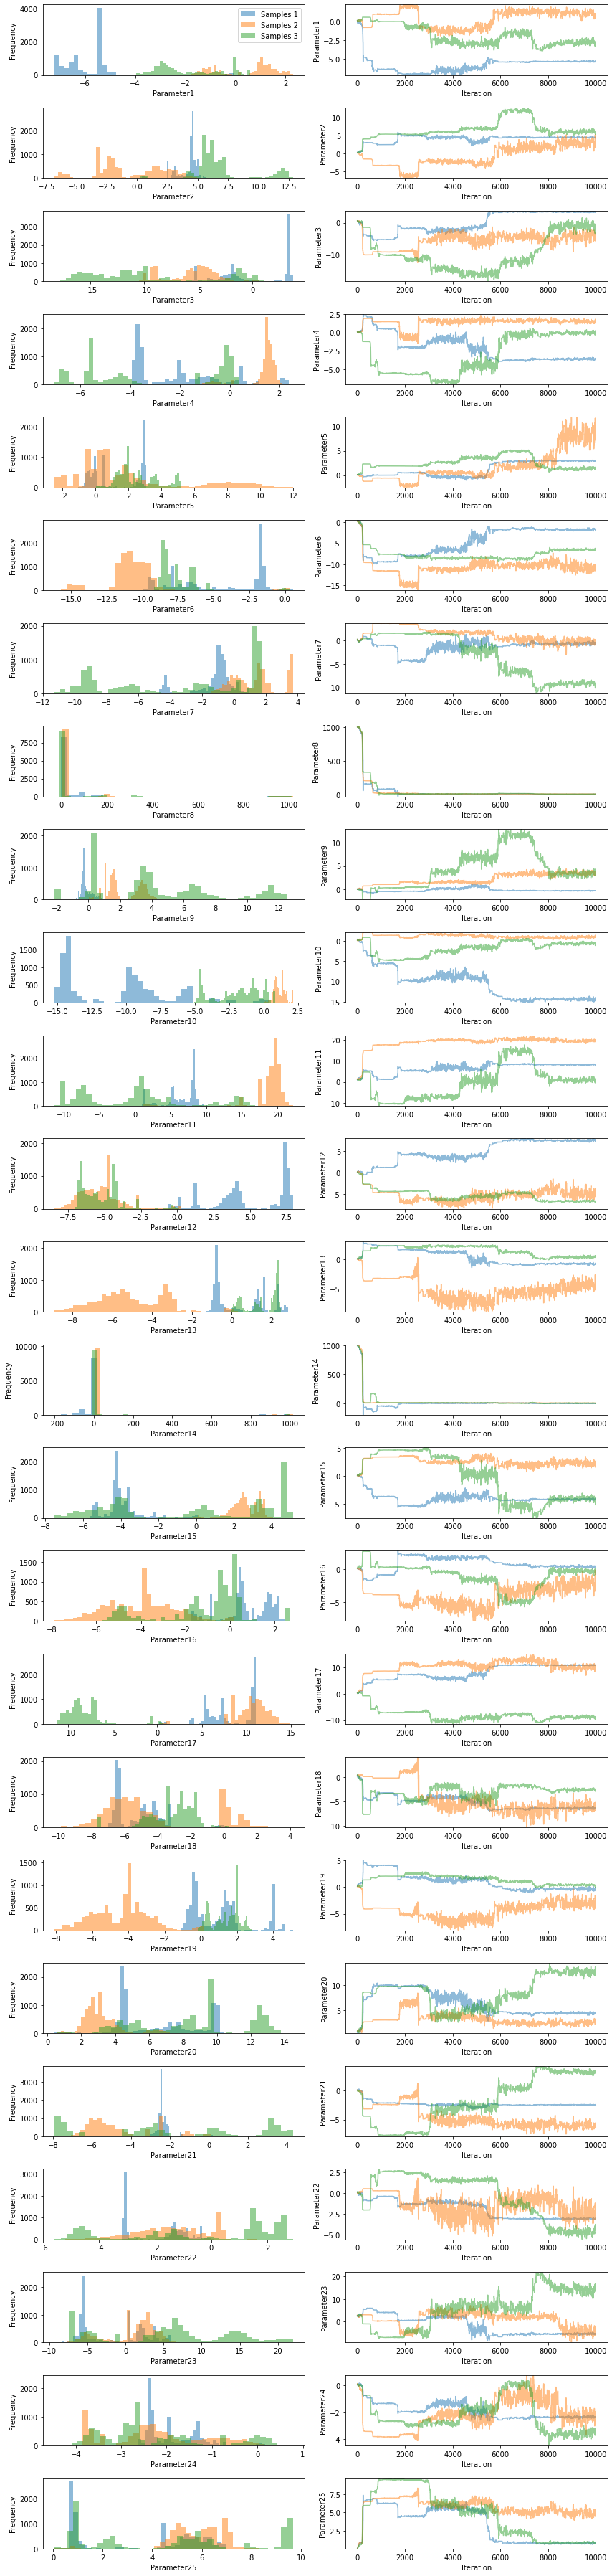

In [6]:
import matplotlib.pyplot as plt
import pints.plot

pints.plot.trace(samples=traces)
plt.show()

## Bibliography

- <a name="ref1"> [1] </a> Eigenmann et. al., Combining Nonclinical Experiments with Translational PKPD Modeling to Differentiate Erlotinib and Gefitinib, Mol Cancer Ther (2016)
- <a name="ref2"> [2] </a> Haario & Saksman & Tamminen, An adaptive Metropolis algorithm, Bernoulli (2001)
- <a name="ref2"> [3] </a> Neal, MCMC using Hamiltonian dynamics, Chapter 5 of the Handbook of Markov Chain Monte Carlo by Steve Brooks, Andrew Gelman, Galin Jones, and Xiao-Li Meng
- <a name="ref2"> [4] </a> Hoffman, M. D., & Gelman, A., The No-U-Turn sampler: adaptively setting path lengths in Hamiltonian Monte Carlo, Journal of Machine Learning Research, (2014)

## Notebook references

- <a name="ref1"> [n1] </a> [Structural Lung Cancer Growth Model in Absence of Treatment](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/structural_model.ipynb)
- <a name="ref1"> [n2] </a> [Identifiability of Structural Model for Lung Cancer Growth in Absence of Treatment](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/identifiability_structural_model.ipynb)
- <a name="ref3"> [n3] </a> [Lung Cancer Tumour Growth in Absence of Treatment](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/data_preparation.ipynb)

[Back to project overview](https://github.com/DavAug/ErlotinibGefitinib/blob/master/README.md) | [Back to lung cancer control growth overview](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/overview.ipynb) | [Back to lung cancer control growth error model overview](https://nbviewer.jupyter.org/github/DavAug/ErlotinibGefitinib/blob/master/notebooks/lung_cancer/control_growth/error_model.ipynb)